In [1]:
import os
from cityscapesscripts.preparation.createTrainIdLabelImgs import main
os.environ['CITYSCAPES_DATASET'] = '/Users/vemundlund/Code/vi-miniproject/data'

# main()

from train import main
from evaluate import evaluate, plot_losses
import segmentation_models_pytorch as smp
from cityscapesscripts.evaluation.evalPixelLevelSemanticLabeling import main_eval

load_model = False
root_dir = './data'
img_height = 32
img_width = 32
batch_size = 16
lr = 0.0005
epochs = 1
model_is_unet = False
# MODELLER: UNET, DEEPLABV3, DEEPLABV3PLUS, PAN, FPN, UNET++
# models = [smp.Unet(in_channels=3, classes=19, encoder_weights="imagenet"), smp.UnetPlusPlus(in_channels=3, classes=19, encoder_weights="imagenet"), smp.DeepLabV3(in_channels=3, classes=19, encoder_weights="imagenet"), smp.DeepLabV3Plus(in_channels=3, classes=19, encoder_weights="imagenet"), smp.PAN(in_channels=3, classes=19, encoder_weights="imagenet"), smp.FPN(in_channels=3, classes=19, encoder_weights="imagenet")]
models = [smp.Unet(in_channels=3, classes=19)]

def run(model_type, model_path, save_evalutation_path, export_directory):
    # main(
    #     model_path,
    #     load_model,
    #     root_dir,
    #     img_height,
    #     img_width,
    #     batch_size,
    #     lr,
    #     epochs,
    #     model_is_unet,
    #     model=model_type
    # )
    # evaluate(path=model_path, model_is_unet=model_is_unet, IMAGE_HEIGHT=img_height, IMAGE_WIDTH=img_width, model=model_type, location=save_evalutation_path)
    # plot_losses(model_path) 
    main_eval(export_directory)

for i, model_type in enumerate(models):
    try:
        model_name = model_type.name
    except:
        model_name = f'deeplabv3_{i}'

    if not os.path.exists(f'./saved_images/multiclass_1/{model_name}'):
        os.mkdir(f'./saved_images/multiclass_1/{model_name}')
    
    model_path = f'./{model_name}.pt'
    save_evalutation_path = f'./saved_images/multiclass_1/{model_name}'
    os.environ['CITYSCAPES_RESULTS'] = f'/Users/vemundlund/Code/vi-miniproject/{save_evalutation_path}'
    export_directory = f'./data/evaluationResults/{model_name}.json'
    run(model_type=model_type, model_path=model_path, save_evalutation_path=save_evalutation_path, export_directory=export_directory)


/Users/vemundlund/miniconda3/envs/vi_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on the MPS
Running on the MPS
.data/evaluationResults/u-resnet34.json
Evaluating 500 pairs of images...
Images Processed: 500 

-------------- ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------- 
              |  u   |  e   |  r   |  o   |  s   |  d   |  g   |  r   |  s   |  p   |  r   |  b   |  w   |  f   |  g   |  b   |  t   |  p   |  p   |  t   |  t   |  v   |  t   |  s   |  p   |  r   |  c   |  t   |  b   |  c   |  t   |  t   |  m   |  b   | Prior |
-------------- ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------ ------- 
    unlabeled | 0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.

In [4]:
from PIL import Image

# img = Image.open("./cityscapes/leftImg8bit/val/frankfurt/frankfurt_000000_000294_leftImg8bit.png")
# pred = Image.open("./saved_images/multiclass_1/frankfurt_000000_000294_.png")
# ground_truth = Image.open("./cityscapes/gtFine/val/frankfurt/frankfurt_000000_000294_gtFine_labelIds.png")

from cityscapesscripts.helpers.labels import labels

def label_to_color(label):
    for _label in labels:
        if _label.id == label:
            # print(_label)
            return _label.color


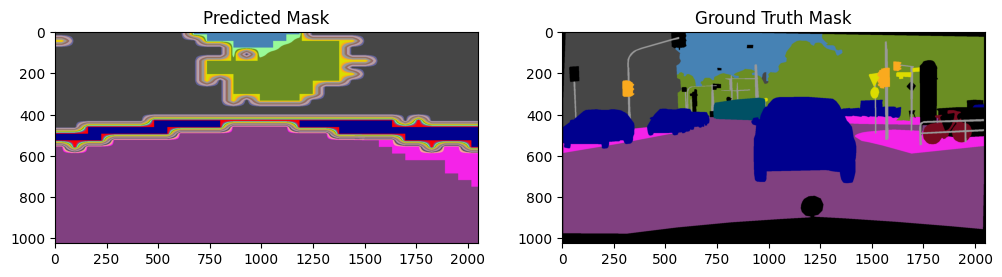

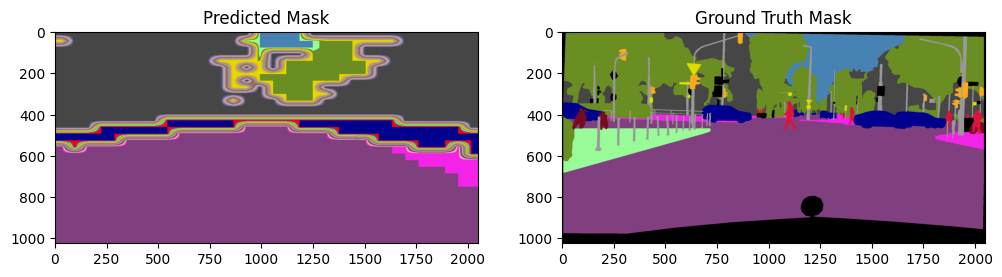

FileNotFoundError: [Errno 2] No such file or directory: './saved_images/multiclass_1/deeplabv3_3/frankfurt_000000_003357_.png'

In [12]:
import torch
import matplotlib.pyplot as plt

import torch 
from PIL import Image 
import torchvision.transforms as transforms 

def display_pred(predicted_mask_path, ground_truth_mask_path):
    predicted_mask = Image.open(predicted_mask_path)
    ground_truth_mask = Image.open(ground_truth_mask_path)

    # Define a transform to convert PIL  
    # image to a Torch tensor 
    transform = transforms.Compose([ 
        transforms.PILToTensor() 
    ]) 
    
    # transform = transforms.PILToTensor() 
    # Convert the PIL image to Torch tensor 
    predicted_mask = transform(predicted_mask)
    ground_truth_mask = transform(ground_truth_mask)

    # Create a function to apply the color mapping to a mask
    def apply_color_mapping(mask):
        colored_mask = torch.zeros((mask.size(1), mask.size(2), 3), dtype=torch.uint8)
        for label in range(34):  # 19 classes in Cityscapes
            colored_mask[mask[0] == label] = torch.tensor(label_to_color(label), dtype=torch.uint8)
        return colored_mask

    # Apply color mapping to predicted and ground truth masks
    colored_predicted_mask = apply_color_mapping(predicted_mask)
    colored_ground_truth_mask = apply_color_mapping(ground_truth_mask)

    plt.figure(figsize=(12, 6))
    # Display the images
    plt.subplot(1, 2, 1)
    plt.imshow(colored_predicted_mask)
    plt.title('Predicted Mask')

    plt.subplot(1, 2, 2)
    plt.imshow(colored_ground_truth_mask)
    plt.title('Ground Truth Mask')

    plt.show()


paths = os.listdir("./saved_images/multiclass_1/")

for path in paths:
    pred_path = f"./saved_images/multiclass_1/{path}/frankfurt_000000_003357_.png"
    gt_path = "./data/gtFine/val/frankfurt/frankfurt_000000_003357_gtFine_labelIds.png"
    display_pred(pred_path, gt_path)
    pred_path = f"./saved_images/multiclass_1/{path}/frankfurt_000000_008206_.png"
    gt_path = "./data/gtFine/val/frankfurt/frankfurt_000000_008206_gtFine_labelIds.png"
    display_pred(pred_path, gt_path)